# SVM Implementation

Frist I have loaded locally the preprocessed dataset so that it is ready for implementation

In [ ]:

from google.colab import files
uploaded = files.upload()

Saving preprocessed_dataset.csv to preprocessed_dataset.csv


Applying smote and balancing the dataset. We applied Smote to the training data to balance the class distribution by generating synthetic samples for the minority class.

In [2]:
!pip install imbalanced-learn --quiet

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

df = pd.read_csv("preprocessed_dataset.csv")
df = df.sample(n=10000, random_state=42)

target_column = 'No-show'
X = df.drop(columns=[target_column])
y = df[target_column]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


Now we start with the different hyperparameters of SVM which we will adjust and test to optimize the model's performance

Test #1

C= 0.01 | loss= hinge | penalty=l2 | max_iter=3000 |lass_weight=blank | dual=true

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Confusion Matrix:
 [[1572   23]
 [ 393   12]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.99      0.88      1595
           1       0.34      0.03      0.05       405

    accuracy                           0.79      2000
   macro avg       0.57      0.51      0.47      2000
weighted avg       0.71      0.79      0.72      2000

Accuracy: 0.792


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Mean CV Accuracy: 0.7924002658214232


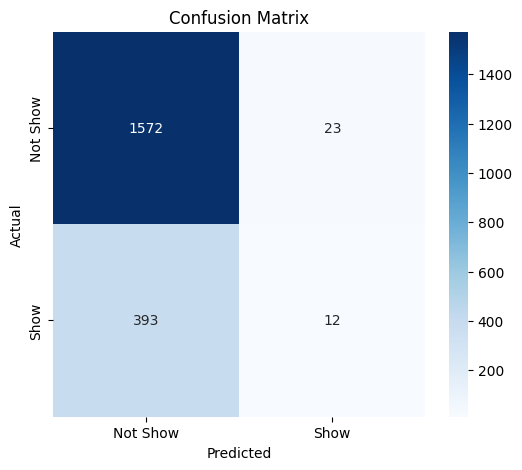

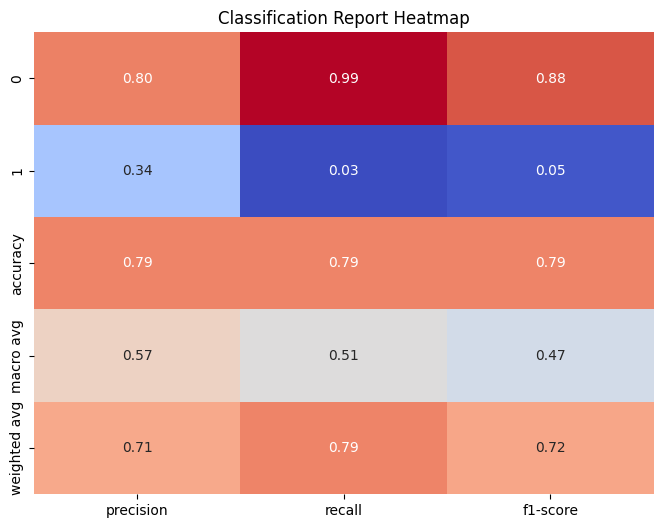

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("preprocessed_dataset.csv")
df = df.sample(n=10000, random_state=42)

target_column = 'No-show'
X = df.drop(columns=[target_column])
y = df[target_column]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

svm_clf = LinearSVC(
    C=1,
    loss='squared_hinge',
    penalty='l2',
    max_iter=3000,
    class_weight=None,
    dual=True,
    random_state=42
)
svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

cv_scores = cross_val_score(svm_clf, X_scaled, y, cv=3)
print("Mean CV Accuracy:", cv_scores.mean())

conf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Show', 'Show'], yticklabels=['Not Show', 'Show'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report).iloc[:-1, :].T
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(class_report_df, annot=True, cmap='coolwarm', cbar=False, fmt='.2f')
plt.title('Classification Report Heatmap')
plt.show()

Test #2

C= 0.01  |  loss= hinge  |  penalty=l2  |  max_iter=5000  |lass_weight=blank  |  dual=true



Confusion Matrix:
 [[1581   14]
 [ 398    7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.99      0.88      1595
           1       0.33      0.02      0.03       405

    accuracy                           0.79      2000
   macro avg       0.57      0.50      0.46      2000
weighted avg       0.70      0.79      0.71      2000

Accuracy: 0.794
Mean CV Accuracy: 0.7946002158704172


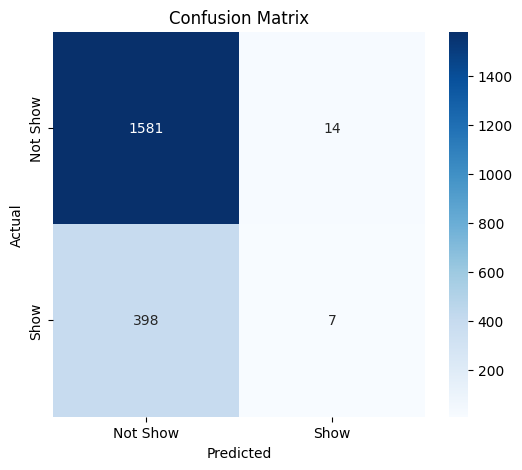

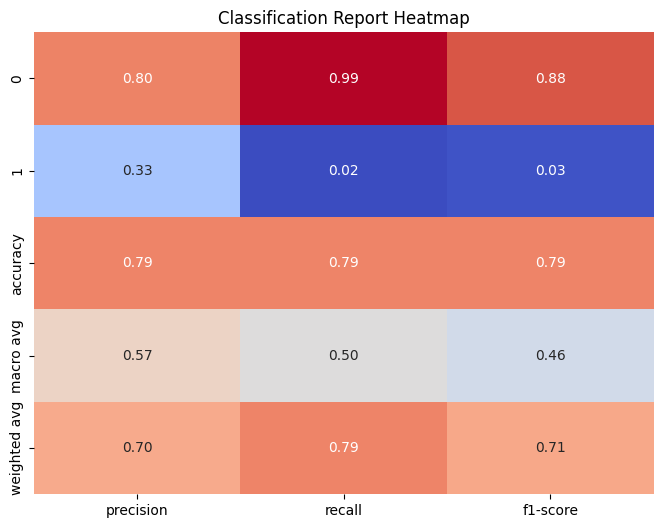

<ipython-input-32-b31f7120cf0c>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cv_score_series.index, y=cv_score_series.values, palette='viridis')


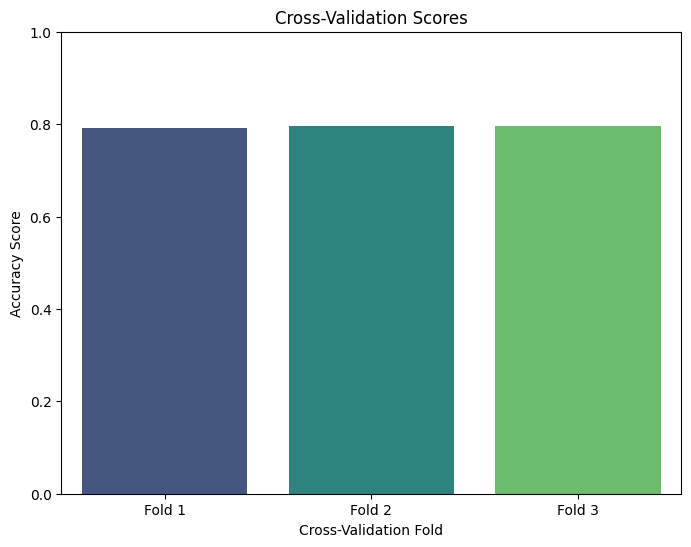

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("preprocessed_dataset.csv")
df = df.sample(n=10000, random_state=42)

target_column = 'No-show'
X = df.drop(columns=[target_column])
y = df[target_column]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

svm_clf = LinearSVC(C=0.01, loss='hinge', penalty='l2', max_iter=5000, dual=True, random_state=42)
svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

cv_scores = cross_val_score(svm_clf, X_scaled, y, cv=3)
print("Mean CV Accuracy:", cv_scores.mean())

conf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Show', 'Show'], yticklabels=['Not Show', 'Show'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report).iloc[:-1, :].T
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(class_report_df, annot=True, cmap='coolwarm', cbar=False, fmt='.2f')
plt.title('Classification Report Heatmap')
plt.show()

cv_score_series = pd.Series(cv_scores, index=[f'Fold {i+1}' for i in range(len(cv_scores))])
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=cv_score_series.index, y=cv_score_series.values, palette='viridis')
plt.ylim(0, 1)
plt.xlabel('Cross-Validation Fold')
plt.ylabel('Accuracy Score')
plt.title('Cross-Validation Scores')
plt.show()



Test #3

 C= 0.01  |  loss= squared_hinge  |  penalty=l2  |  max_iter=10000  |
 lass_weight=balanced  |  dual=true






Confusion Matrix:
 [[1048  547]
 [ 158  247]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.66      0.75      1595
           1       0.31      0.61      0.41       405

    accuracy                           0.65      2000
   macro avg       0.59      0.63      0.58      2000
weighted avg       0.76      0.65      0.68      2000

Accuracy: 0.6475
Mean CV Accuracy: 0.652900023055695


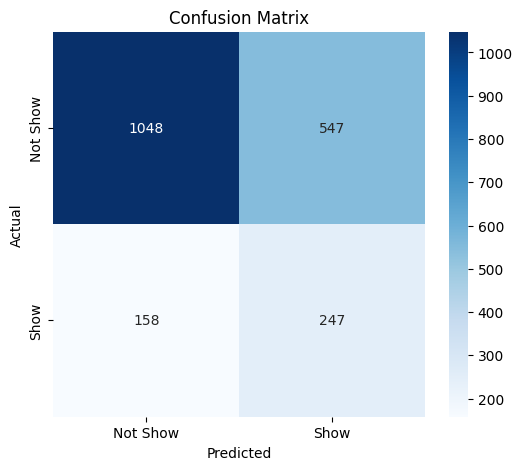

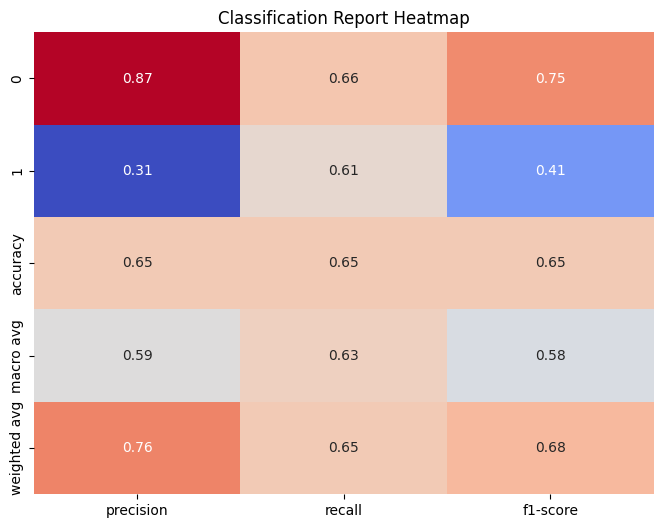

<ipython-input-33-72c70f822f9f>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cv_score_series.index, y=cv_score_series.values, palette='viridis')


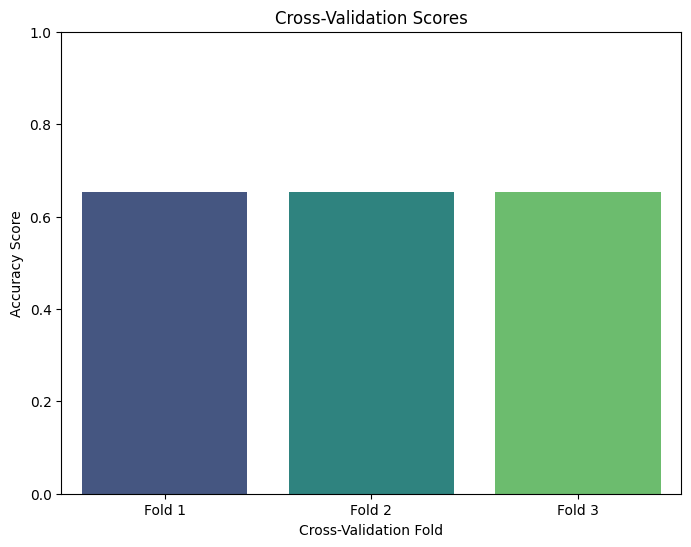

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("preprocessed_dataset.csv")
df = df.sample(n=10000, random_state=42)

target_column = 'No-show'
X = df.drop(columns=[target_column])
y = df[target_column]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

svm_clf = LinearSVC(
    C=0.01,
    loss='squared_hinge',
    penalty='l2',
    max_iter=10000,
    class_weight='balanced',
    dual=True,
    random_state=42
)
svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

cv_scores = cross_val_score(svm_clf, X_scaled, y, cv=3)
print("Mean CV Accuracy:", cv_scores.mean())

conf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Show', 'Show'], yticklabels=['Not Show', 'Show'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report).iloc[:-1, :].T
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(class_report_df, annot=True, cmap='coolwarm', cbar=False, fmt='.2f')
plt.title('Classification Report Heatmap')
plt.show()

cv_score_series = pd.Series(cv_scores, index=[f'Fold {i+1}' for i in range(len(cv_scores))])
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=cv_score_series.index, y=cv_score_series.values, palette='viridis')
plt.ylim(0, 1)
plt.xlabel('Cross-Validation Fold')
plt.ylabel('Accuracy Score')
plt.title('Cross-Validation Scores')
plt.show()


Test #4

C= 0.1 | loss= squared_hinge | penalty=l1 | max_iter=10000 | lass_weight=blank | dual=false




Confusion Matrix:
 [[1576   19]
 [ 394   11]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.99      0.88      1595
           1       0.37      0.03      0.05       405

    accuracy                           0.79      2000
   macro avg       0.58      0.51      0.47      2000
weighted avg       0.71      0.79      0.72      2000

Accuracy: 0.7935
Mean CV Accuracy: 0.7939001758604175


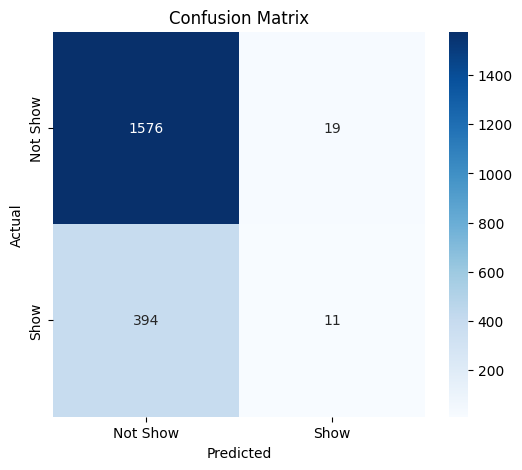

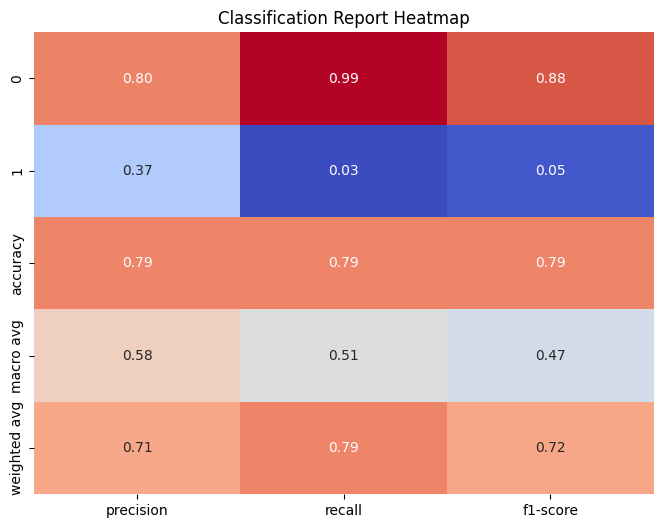

<ipython-input-34-25a5cc5a37d3>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cv_score_series.index, y=cv_score_series.values, palette='viridis')


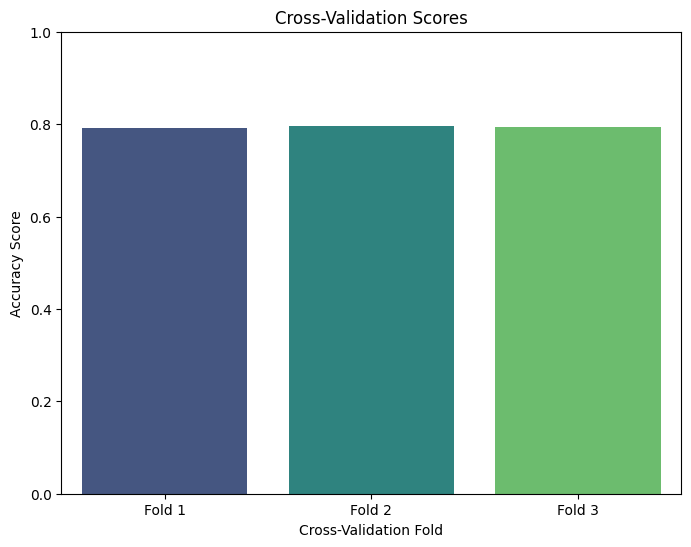

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("preprocessed_dataset.csv")
df = df.sample(n=10000, random_state=42)

target_column = 'No-show'
X = df.drop(columns=[target_column])
y = df[target_column]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

svm_clf = LinearSVC(
    C=0.1,
    loss='squared_hinge',
    penalty='l1',
    max_iter=10000,
    dual=False,
    random_state=42
)
svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

cv_scores = cross_val_score(svm_clf, X_scaled, y, cv=3)
print("Mean CV Accuracy:", cv_scores.mean())

conf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Show', 'Show'], yticklabels=['Not Show', 'Show'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report).iloc[:-1, :].T
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(class_report_df, annot=True, cmap='coolwarm', cbar=False, fmt='.2f')
plt.title('Classification Report Heatmap')
plt.show()

cv_score_series = pd.Series(cv_scores, index=[f'Fold {i+1}' for i in range(len(cv_scores))])
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=cv_score_series.index, y=cv_score_series.values, palette='viridis')
plt.ylim(0, 1)
plt.xlabel('Cross-Validation Fold')
plt.ylabel('Accuracy Score')
plt.title('Cross-Validation Scores')
plt.show()



Test #5


C= 0.1 | loss= squared_hinge | penalty=l2 | max_iter=20000 | lass_weight=balanced | dual=true




Confusion Matrix:
 [[1047  548]
 [ 159  246]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.66      0.75      1595
           1       0.31      0.61      0.41       405

    accuracy                           0.65      2000
   macro avg       0.59      0.63      0.58      2000
weighted avg       0.76      0.65      0.68      2000

Accuracy: 0.6465
Mean CV Accuracy: 0.6532000230616943


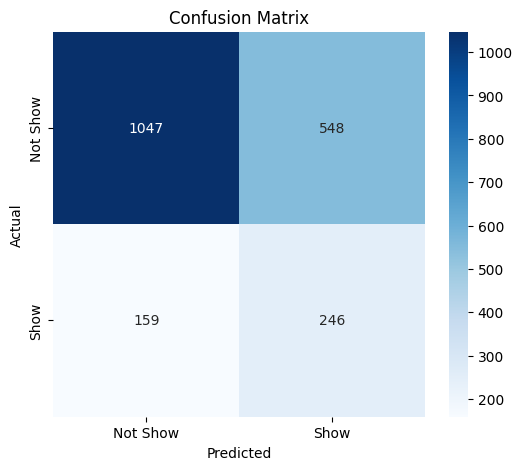

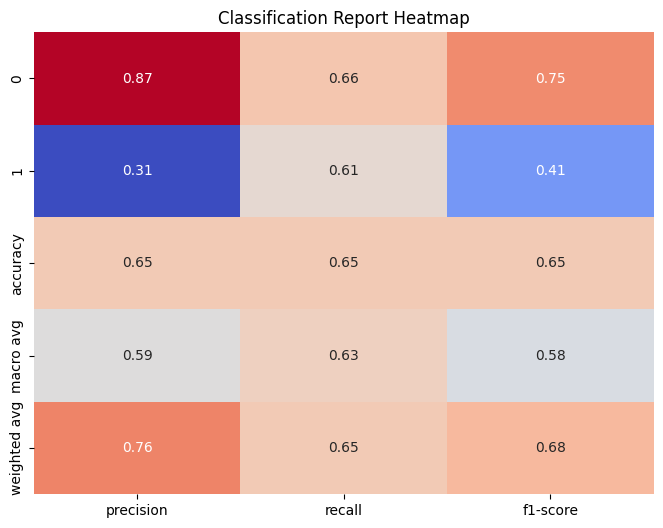

<ipython-input-35-c0f3b49c6778>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cv_score_series.index, y=cv_score_series.values, palette='viridis')


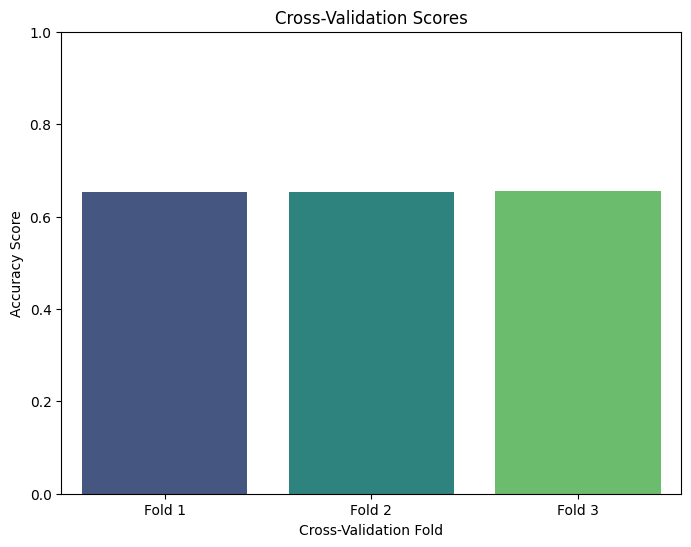

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("preprocessed_dataset.csv")
df = df.sample(n=10000, random_state=42)

target_column = 'No-show'
X = df.drop(columns=[target_column])
y = df[target_column]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

svm_clf = LinearSVC(
    C=0.1,
    loss='squared_hinge',
    penalty='l2',
    max_iter=20000,
    class_weight='balanced',
    dual=True,
    random_state=42
)
svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

cv_scores = cross_val_score(svm_clf, X_scaled, y, cv=3)
print("Mean CV Accuracy:", cv_scores.mean())

conf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Show', 'Show'], yticklabels=['Not Show', 'Show'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report).iloc[:-1, :].T
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(class_report_df, annot=True, cmap='coolwarm', cbar=False, fmt='.2f')
plt.title('Classification Report Heatmap')
plt.show()

cv_score_series = pd.Series(cv_scores, index=[f'Fold {i+1}' for i in range(len(cv_scores))])
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=cv_score_series.index, y=cv_score_series.values, palette='viridis')
plt.ylim(0, 1)
plt.xlabel('Cross-Validation Fold')
plt.ylabel('Accuracy Score')
plt.title('Cross-Validation Scores')
plt.show()


Test #6

 C= 1 | loss= squared_hinge | penalty=l2 | max_iter=5000 | lass_weight=blank | dual=true





/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Confusion Matrix:
 [[1572   23]
 [ 394   11]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.99      0.88      1595
           1       0.32      0.03      0.05       405

    accuracy                           0.79      2000
   macro avg       0.56      0.51      0.47      2000
weighted avg       0.70      0.79      0.71      2000

Accuracy: 0.7915


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Mean CV Accuracy: 0.7928001258434182


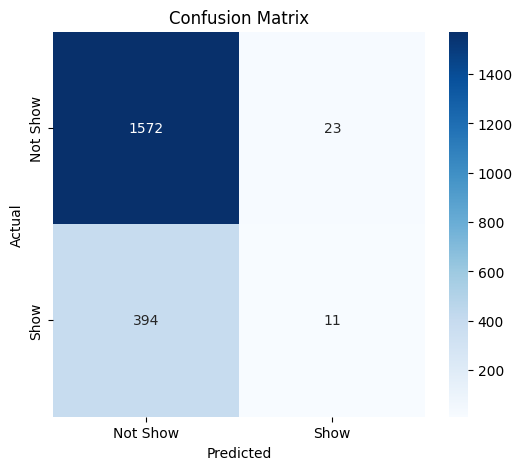

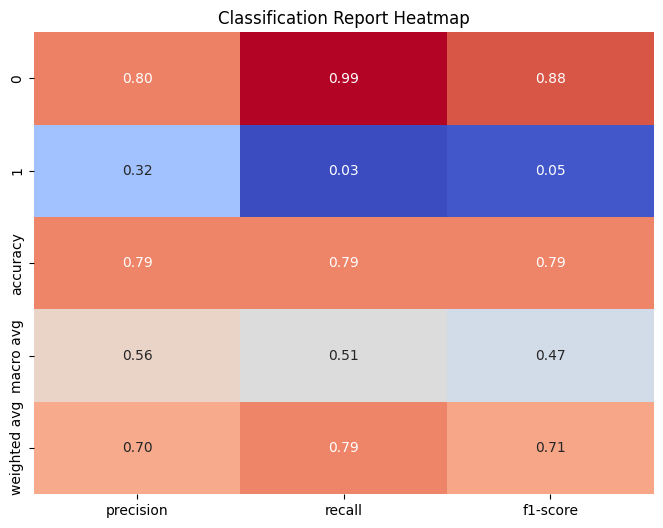

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("preprocessed_dataset.csv")
df = df.sample(n=10000, random_state=42)

target_column = 'No-show'
X = df.drop(columns=[target_column])
y = df[target_column]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

svm_clf = LinearSVC(
    C=1,
    loss='squared_hinge',
    penalty='l2',
    max_iter=5000,
    class_weight=None,
    dual=True,
    random_state=42
)
svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

cv_scores = cross_val_score(svm_clf, X_scaled, y, cv=3)
print("Mean CV Accuracy:", cv_scores.mean())

conf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Show', 'Show'], yticklabels=['Not Show', 'Show'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report).iloc[:-1, :].T
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(class_report_df, annot=True, cmap='coolwarm', cbar=False, fmt='.2f')
plt.title('Classification Report Heatmap')
plt.show()


Test #7

C= 1 | loss= squared_hinge | penalty=l2 | max_iter=10000 | lass_weight=balanced | dual=true



/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Confusion Matrix:
 [[1045  550]
 [ 159  246]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.66      0.75      1595
           1       0.31      0.61      0.41       405

    accuracy                           0.65      2000
   macro avg       0.59      0.63      0.58      2000
weighted avg       0.75      0.65      0.68      2000

Accuracy: 0.6455


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Mean CV Accuracy: 0.6536000330686939


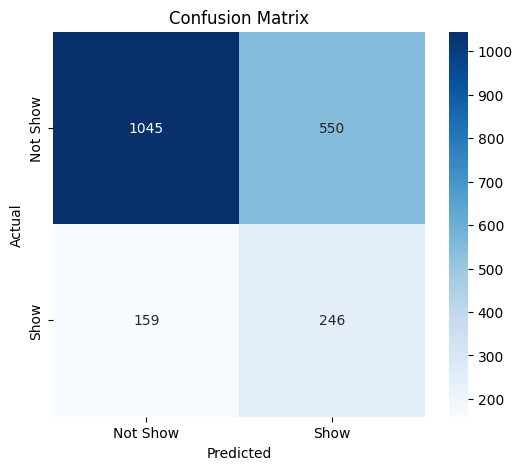

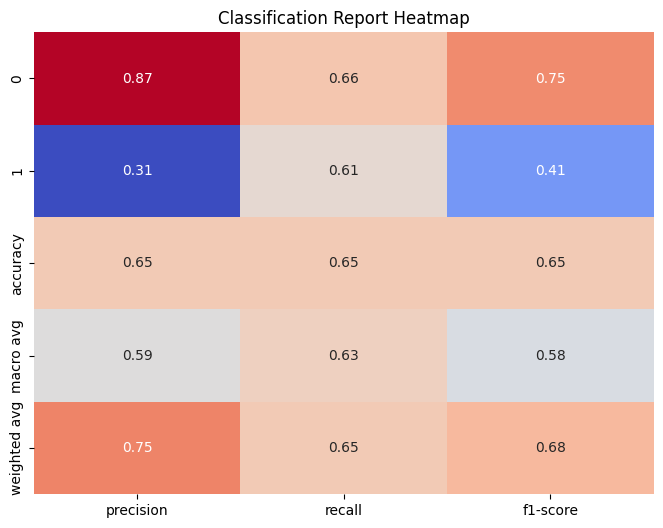

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("preprocessed_dataset.csv")
df = df.sample(n=10000, random_state=42)

target_column = 'No-show'
X = df.drop(columns=[target_column])
y = df[target_column]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

svm_clf = LinearSVC(
    C=1,
    loss='squared_hinge',
    penalty='l2',
    max_iter=10000,
    class_weight='balanced',
    dual=True,
    random_state=42
)
svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

cv_scores = cross_val_score(svm_clf, X_scaled, y, cv=3)
print("Mean CV Accuracy:", cv_scores.mean())

conf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Show', 'Show'], yticklabels=['Not Show', 'Show'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report).iloc[:-1, :].T
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(class_report_df, annot=True, cmap='coolwarm', cbar=False, fmt='.2f')
plt.title('Classification Report Heatmap')
plt.show()


Test #8

C= 10 | loss= hinge | penalty=l2 | max_iter=10000 | lass_weight=blank | dual=true



/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Confusion Matrix:
 [[1586    9]
 [ 398    7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.99      0.89      1595
           1       0.44      0.02      0.03       405

    accuracy                           0.80      2000
   macro avg       0.62      0.51      0.46      2000
weighted avg       0.73      0.80      0.71      2000

Accuracy: 0.7965


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Mean CV Accuracy: 0.7949002158764166


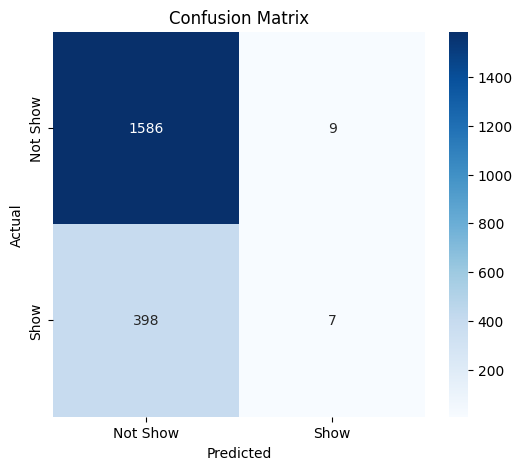

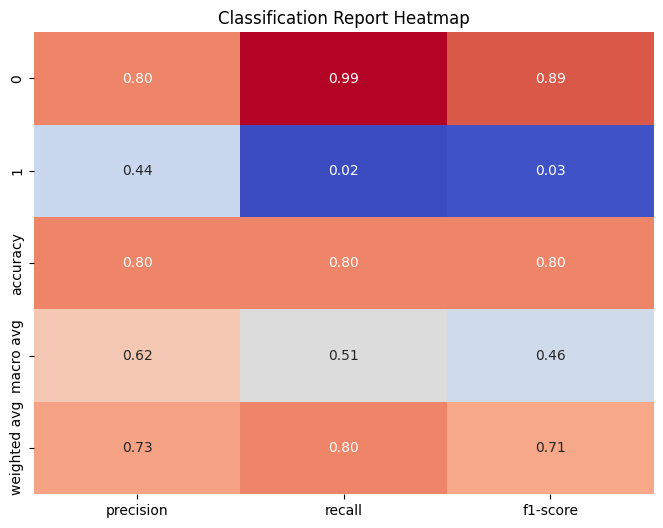

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("preprocessed_dataset.csv")
df = df.sample(n=10000, random_state=42)

target_column = 'No-show'
X = df.drop(columns=[target_column])
y = df[target_column]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

svm_clf = LinearSVC(
    C=10,
    loss='hinge',
    penalty='l2',
    max_iter=10000,
    class_weight=None,
    dual=True,
    random_state=42
)
svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

cv_scores = cross_val_score(svm_clf, X_scaled, y, cv=3)
print("Mean CV Accuracy:", cv_scores.mean())

conf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Show', 'Show'], yticklabels=['Not Show', 'Show'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report).iloc[:-1, :].T
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(class_report_df, annot=True, cmap='coolwarm', cbar=False, fmt='.2f')
plt.title('Classification Report Heatmap')
plt.show()


Test #9

C= 10 | loss= squared_hinge | penalty=l2 | max_iter=20000 | lass_weight=balanced | dual=true



/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Confusion Matrix:
 [[1049  546]
 [ 163  242]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.66      0.75      1595
           1       0.31      0.60      0.41       405

    accuracy                           0.65      2000
   macro avg       0.59      0.63      0.58      2000
weighted avg       0.75      0.65      0.68      2000

Accuracy: 0.6455


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Mean CV Accuracy: 0.6554002730806975


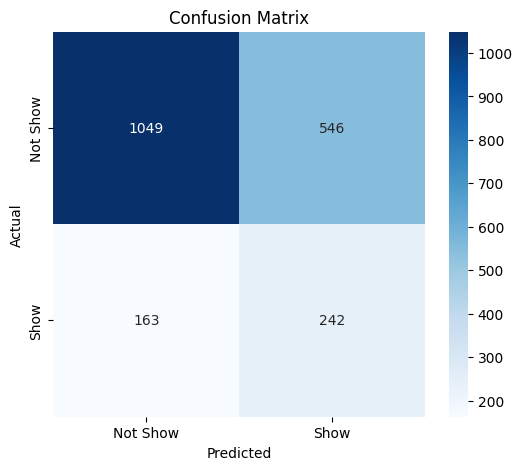

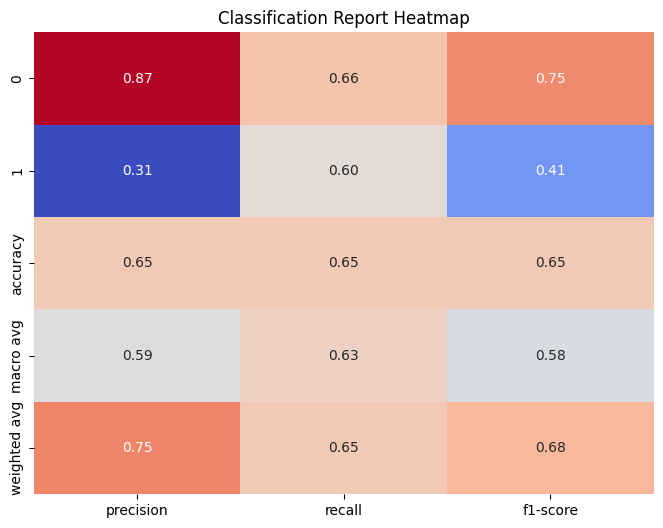

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("preprocessed_dataset.csv")
df = df.sample(n=10000, random_state=42)

target_column = 'No-show'
X = df.drop(columns=[target_column])
y = df[target_column]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

svm_clf = LinearSVC(
    C=10,
    loss='squared_hinge',
    penalty='l2',
    max_iter=20000,
    class_weight='balanced',
    dual=True,
    random_state=42
)
svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

cv_scores = cross_val_score(svm_clf, X_scaled, y, cv=3)
print("Mean CV Accuracy:", cv_scores.mean())

conf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Show', 'Show'], yticklabels=['Not Show', 'Show'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report).iloc[:-1, :].T
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(class_report_df, annot=True, cmap='coolwarm', cbar=False, fmt='.2f')
plt.title('Classification Report Heatmap')
plt.show()


Test #10

C= 100 | loss= hinge | penalty=l2 | max_iter=5000 | lass_weight=blank | dual=true



/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Confusion Matrix:
 [[1431  164]
 [ 347   58]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85      1595
           1       0.26      0.14      0.19       405

    accuracy                           0.74      2000
   macro avg       0.53      0.52      0.52      2000
weighted avg       0.69      0.74      0.71      2000

Accuracy: 0.7445


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Mean CV Accuracy: 0.7565003350964971


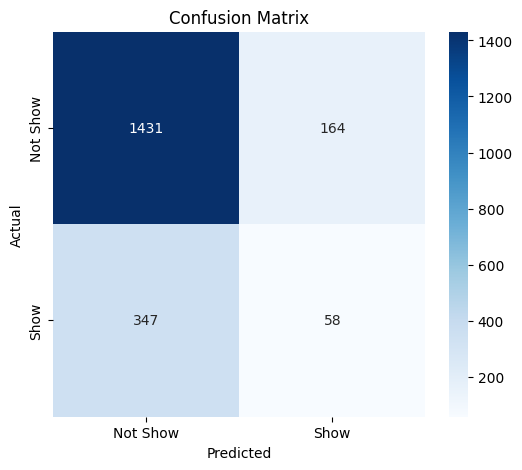

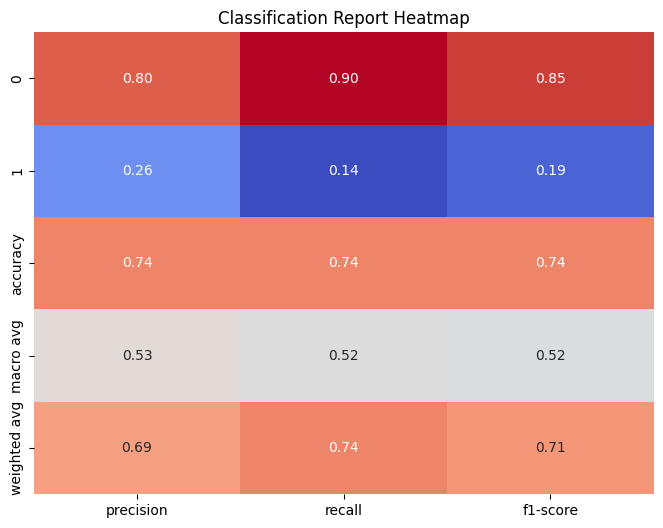

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("preprocessed_dataset.csv")
df = df.sample(n=10000, random_state=42)

target_column = 'No-show'
X = df.drop(columns=[target_column])
y = df[target_column]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

svm_clf = LinearSVC(
    C=100,
    loss='hinge',
    penalty='l2',
    max_iter=5000,
    class_weight=None,
    dual=True,
    random_state=42
)
svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

cv_scores = cross_val_score(svm_clf, X_scaled, y, cv=3)
print("Mean CV Accuracy:", cv_scores.mean())

conf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Show', 'Show'], yticklabels=['Not Show', 'Show'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report).iloc[:-1, :].T
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(class_report_df, annot=True, cmap='coolwarm', cbar=False, fmt='.2f')
plt.title('Classification Report Heatmap')
plt.show()


Test #11

C= 100 | loss= squared_hinge | penalty=l2 | max_iter=10000 | lass_weight=balanced | dual=true


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Confusion Matrix:
 [[1286  309]
 [ 302  103]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1595
           1       0.25      0.25      0.25       405

    accuracy                           0.69      2000
   macro avg       0.53      0.53      0.53      2000
weighted avg       0.70      0.69      0.70      2000

Accuracy: 0.6945


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Mean CV Accuracy: 0.671402263201725


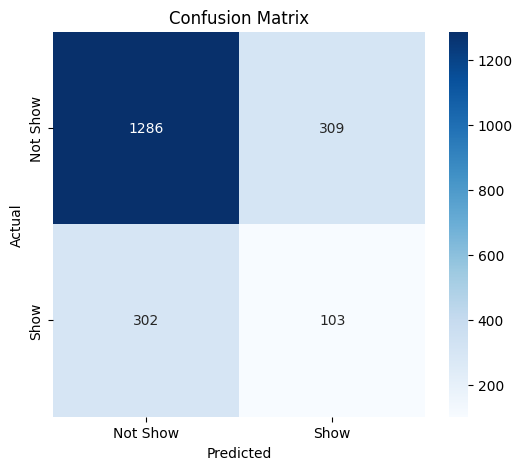

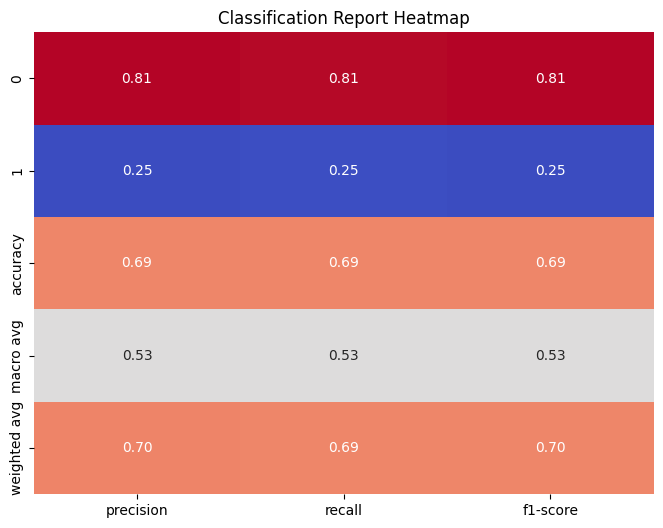

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("preprocessed_dataset.csv")
df = df.sample(n=10000, random_state=42)

target_column = 'No-show'
X = df.drop(columns=[target_column])
y = df[target_column]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

svm_clf = LinearSVC(
    C=100,
    loss='squared_hinge',
    penalty='l2',
    max_iter=10000,
    class_weight='balanced',
    dual=True,
    random_state=42
)
svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

cv_scores = cross_val_score(svm_clf, X_scaled, y, cv=3)
print("Mean CV Accuracy:", cv_scores.mean())

conf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Show', 'Show'], yticklabels=['Not Show', 'Show'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report).iloc[:-1, :].T
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(class_report_df, annot=True, cmap='coolwarm', cbar=False, fmt='.2f')
plt.title('Classification Report Heatmap')
plt.show()


Test #12

C= 0.01 | loss= hinge | penalty=l2 | max_iter=15000 | lass_weight=balanced | dual=true


Confusion Matrix:
 [[1056  539]
 [ 163  242]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.66      0.75      1595
           1       0.31      0.60      0.41       405

    accuracy                           0.65      2000
   macro avg       0.59      0.63      0.58      2000
weighted avg       0.75      0.65      0.68      2000

Accuracy: 0.649
Mean CV Accuracy: 0.6431008127807382


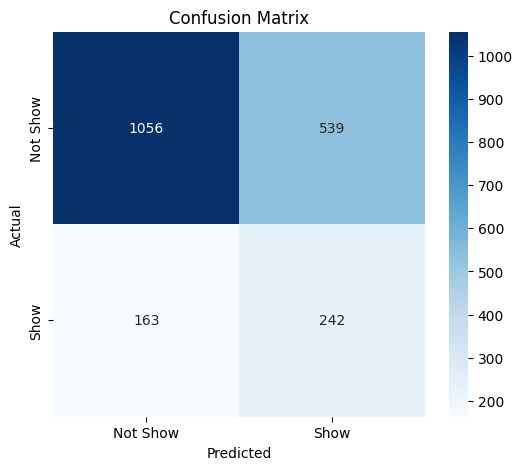

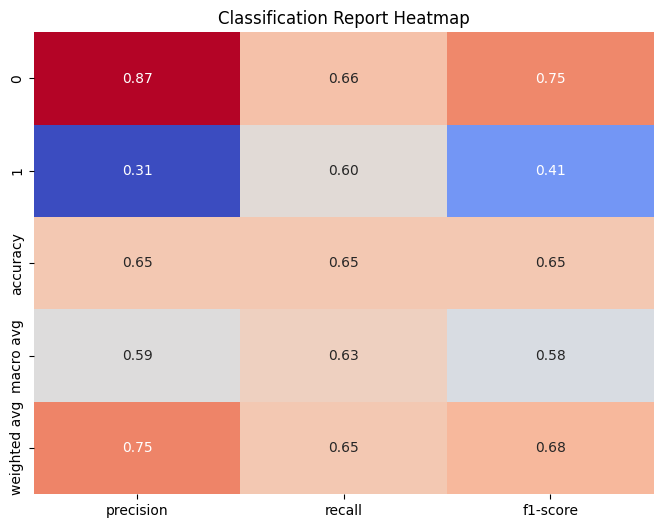

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("preprocessed_dataset.csv")
df = df.sample(n=10000, random_state=42)

target_column = 'No-show'
X = df.drop(columns=[target_column])
y = df[target_column]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

svm_clf = LinearSVC(
    C=0.01,
    loss='hinge',
    penalty='l2',
    max_iter=15000,
    class_weight='balanced',
    dual=True,
    random_state=42
)
svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

cv_scores = cross_val_score(svm_clf, X_scaled, y, cv=3)
print("Mean CV Accuracy:", cv_scores.mean())

conf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Show', 'Show'], yticklabels=['Not Show', 'Show'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report).iloc[:-1, :].T
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(class_report_df, annot=True, cmap='coolwarm', cbar=False, fmt='.2f')
plt.title('Classification Report Heatmap')
plt.show()


Test #13

C= 0.1 | loss= squared_hinge | penalty=l2 | max_iter=5000 | lass_weight=blank | dual=true


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Confusion Matrix:
 [[1573   22]
 [ 394   11]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.99      0.88      1595
           1       0.33      0.03      0.05       405

    accuracy                           0.79      2000
   macro avg       0.57      0.51      0.47      2000
weighted avg       0.71      0.79      0.71      2000

Accuracy: 0.792


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Mean CV Accuracy: 0.7929001358444183


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


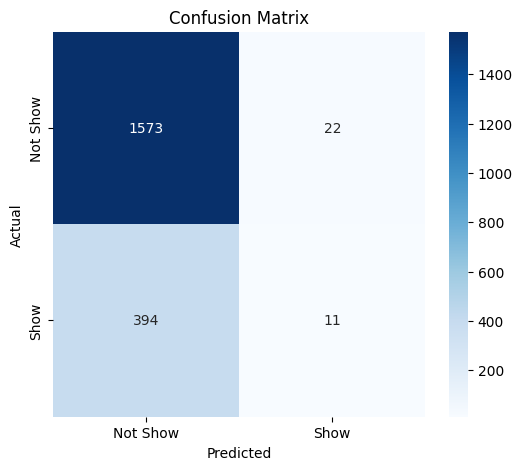

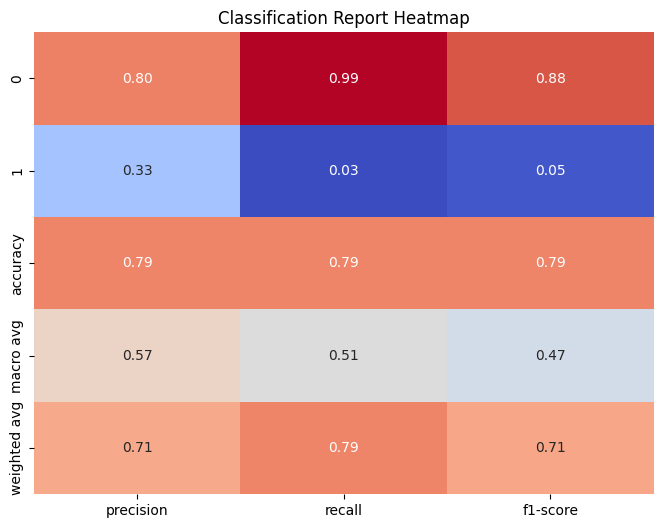

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("preprocessed_dataset.csv")
df = df.sample(n=10000, random_state=42)

target_column = 'No-show'
X = df.drop(columns=[target_column])
y = df[target_column]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

svm_clf = LinearSVC(
    C=0.1,
    loss='squared_hinge',
    penalty='l2',
    max_iter=5000,
    class_weight=None,
    dual=True,
    random_state=42
)
svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

cv_scores = cross_val_score(svm_clf, X_scaled, y, cv=3)
print("Mean CV Accuracy:", cv_scores.mean())

conf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Show', 'Show'], yticklabels=['Not Show', 'Show'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report).iloc[:-1, :].T
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(class_report_df, annot=True, cmap='coolwarm', cbar=False, fmt='.2f')
plt.title('Classification Report Heatmap')
plt.show()


Test #14

C= 1 | loss= hinge | penalty=l2 | max_iter=20000 | lass_weight=balanced | dual=True


Confusion Matrix:
 [[1036  559]
 [ 159  246]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.65      0.74      1595
           1       0.31      0.61      0.41       405

    accuracy                           0.64      2000
   macro avg       0.59      0.63      0.57      2000
weighted avg       0.75      0.64      0.67      2000

Accuracy: 0.641


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Mean CV Accuracy: 0.6400003827617314


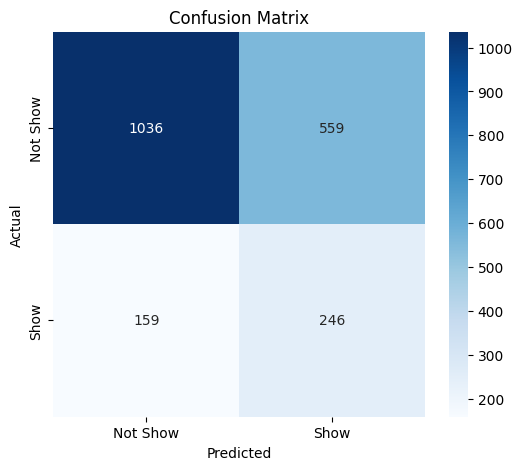

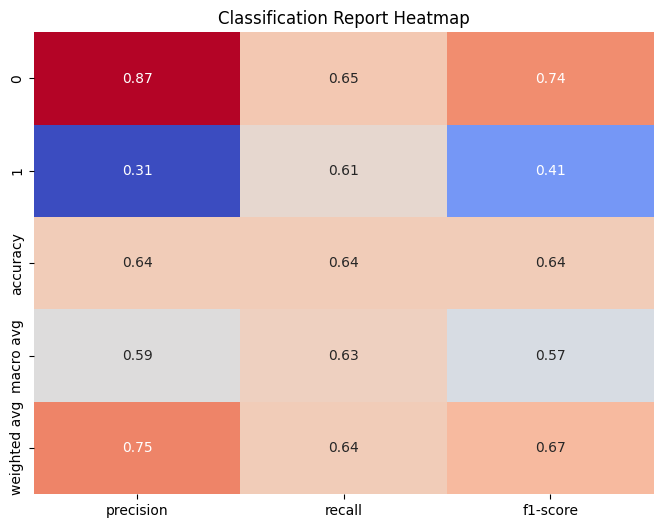

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("preprocessed_dataset.csv")
df = df.sample(n=10000, random_state=42)

target_column = 'No-show'
X = df.drop(columns=[target_column])
y = df[target_column]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

svm_clf = LinearSVC(
    C=1,
    loss='hinge',
    penalty='l2',
    max_iter=20000,
    class_weight='balanced',
    dual=True,
    random_state=42
)
svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

cv_scores = cross_val_score(svm_clf, X_scaled, y, cv=3)
print("Mean CV Accuracy:", cv_scores.mean())

conf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Show', 'Show'], yticklabels=['Not Show', 'Show'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report).iloc[:-1, :].T
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(class_report_df, annot=True, cmap='coolwarm', cbar=False, fmt='.2f')
plt.title('Classification Report Heatmap')
plt.show()


Test #15

C= 10 | loss= squared_hinge | penalty=l2 | max_iter=10000 | lass_weight=blank | dual=true


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Confusion Matrix:
 [[1574   21]
 [ 389   16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.99      0.88      1595
           1       0.43      0.04      0.07       405

    accuracy                           0.80      2000
   macro avg       0.62      0.51      0.48      2000
weighted avg       0.73      0.80      0.72      2000

Accuracy: 0.795


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Mean CV Accuracy: 0.7909001758004234


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


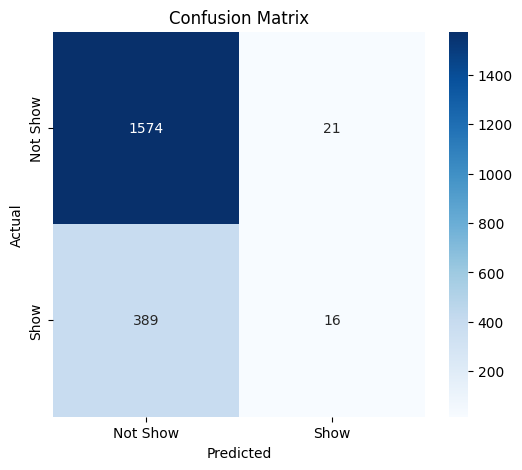

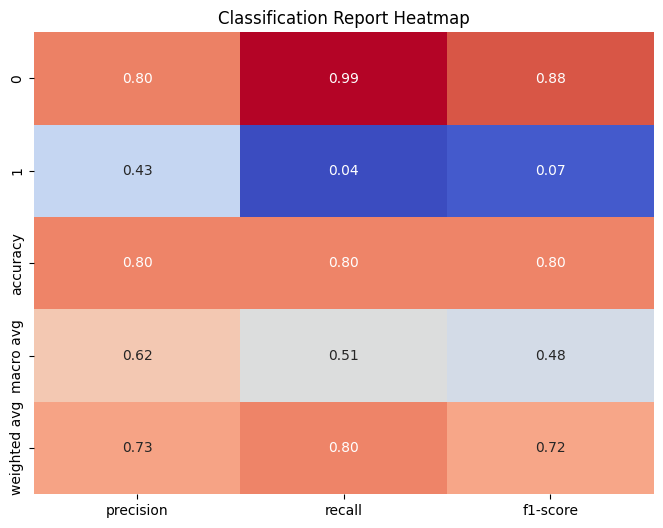

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("preprocessed_dataset.csv")
df = df.sample(n=10000, random_state=42)

target_column = 'No-show'
X = df.drop(columns=[target_column])
y = df[target_column]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

svm_clf = LinearSVC(
    C=10,
    loss='squared_hinge',
    penalty='l2',
    max_iter=10000,
    class_weight=None,
    dual=True,
    random_state=42
)
svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

cv_scores = cross_val_score(svm_clf, X_scaled, y, cv=3)
print("Mean CV Accuracy:", cv_scores.mean())

conf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Show', 'Show'], yticklabels=['Not Show', 'Show'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report).iloc[:-1, :].T
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(class_report_df, annot=True, cmap='coolwarm', cbar=False, fmt='.2f')
plt.title('Classification Report Heatmap')
plt.show()


Test #16

 C= 100 | loss= hinge | penalty=l2 | max_iter=15000 | lass_weight=balanced | dual=true


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Confusion Matrix:
 [[1106  489]
 [ 178  227]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.69      0.77      1595
           1       0.32      0.56      0.40       405

    accuracy                           0.67      2000
   macro avg       0.59      0.63      0.59      2000
weighted avg       0.75      0.67      0.69      2000

Accuracy: 0.6665


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Mean CV Accuracy: 0.6485999829737022


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


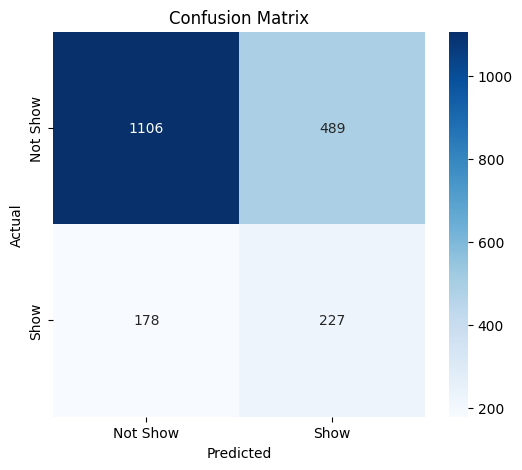

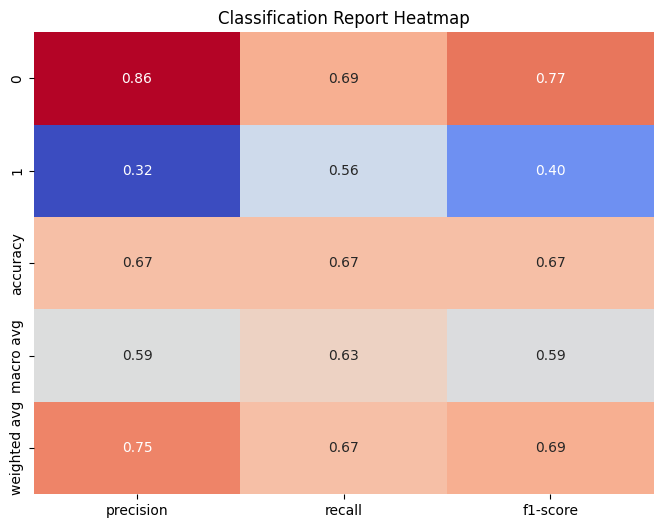

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("preprocessed_dataset.csv")
df = df.sample(n=10000, random_state=42)

target_column = 'No-show'
X = df.drop(columns=[target_column])
y = df[target_column]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

svm_clf = LinearSVC(
    C=100,
    loss='hinge',
    penalty='l2',
    max_iter=15000,
    class_weight='balanced',
    dual=True,
    random_state=42
)
svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

cv_scores = cross_val_score(svm_clf, X_scaled, y, cv=3)
print("Mean CV Accuracy:", cv_scores.mean())

conf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Show', 'Show'], yticklabels=['Not Show', 'Show'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report).iloc[:-1, :].T
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(class_report_df, annot=True, cmap='coolwarm', cbar=False, fmt='.2f')
plt.title('Classification Report Heatmap')
plt.show()


Test #17

 C= 0.01 | loss= squared_hinge | penalty=l2 | max_iter=20000 | lass_weight=blank | dual=true


Confusion Matrix:
 [[1573   22]
 [ 394   11]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.99      0.88      1595
           1       0.33      0.03      0.05       405

    accuracy                           0.79      2000
   macro avg       0.57      0.51      0.47      2000
weighted avg       0.71      0.79      0.71      2000

Accuracy: 0.792
Mean CV Accuracy: 0.7929001058474174


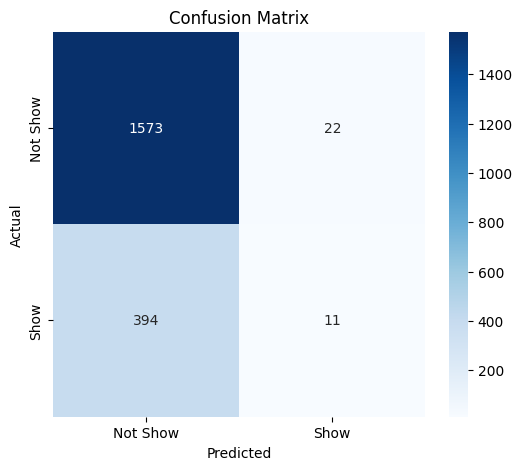

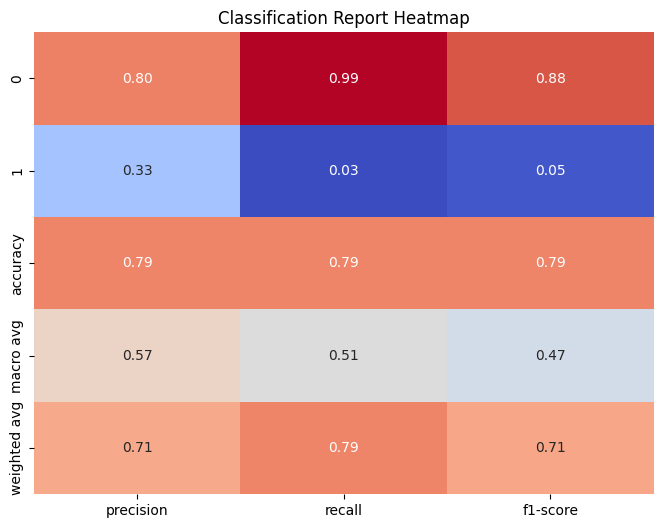

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("preprocessed_dataset.csv")
df = df.sample(n=10000, random_state=42)

target_column = 'No-show'
X = df.drop(columns=[target_column])
y = df[target_column]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

svm_clf = LinearSVC(
    C=0.01,
    loss='squared_hinge',
    penalty='l2',
    max_iter=20000,
    class_weight=None,
    dual=True,
    random_state=42
)
svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

cv_scores = cross_val_score(svm_clf, X_scaled, y, cv=3)
print("Mean CV Accuracy:", cv_scores.mean())

conf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Show', 'Show'], yticklabels=['Not Show', 'Show'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report).iloc[:-1, :].T
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(class_report_df, annot=True, cmap='coolwarm', cbar=False, fmt='.2f')
plt.title('Classification Report Heatmap')
plt.show()


Test #18

 C= 0.1 | loss= hinge | penalty=l1 | max_iter=5000 | lass_weight=balanced | dual=false


Confusion Matrix:
 [[995 600]
 [139 266]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.62      0.73      1595
           1       0.31      0.66      0.42       405

    accuracy                           0.63      2000
   macro avg       0.59      0.64      0.57      2000
weighted avg       0.76      0.63      0.67      2000

Accuracy: 0.6305


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Mean CV Accuracy: 0.6399003727607314


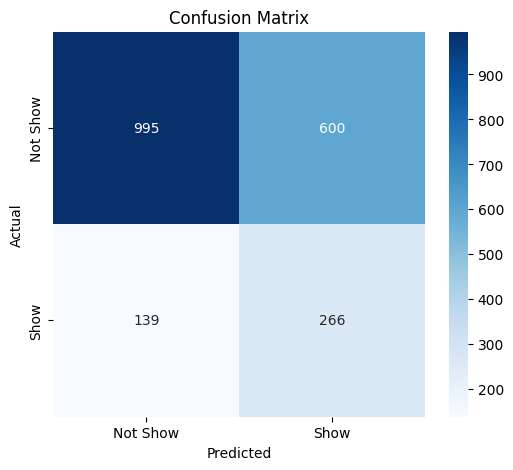

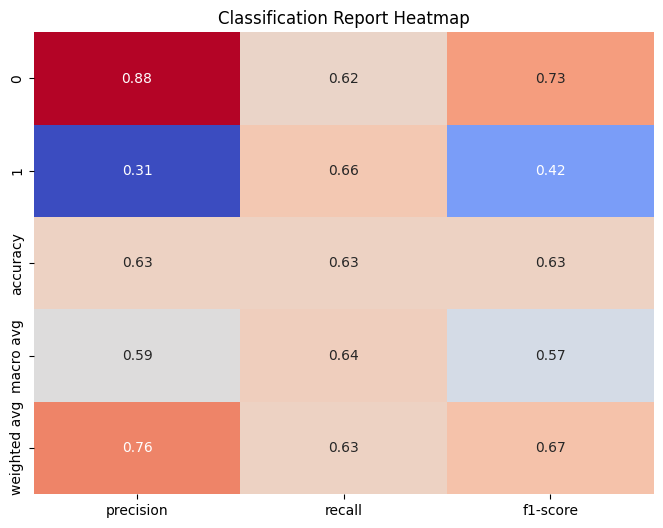

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("preprocessed_dataset.csv")
df = df.sample(n=10000, random_state=42)

target_column = 'No-show'
X = df.drop(columns=[target_column])
y = df[target_column]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

svm_clf = LinearSVC(
    C=0.1,
    loss='hinge',
    penalty='l2',
    max_iter=5000,
    class_weight='balanced',
    dual=True,
    random_state=42
)
svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

cv_scores = cross_val_score(svm_clf, X_scaled, y, cv=3)
print("Mean CV Accuracy:", cv_scores.mean())

conf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Show', 'Show'], yticklabels=['Not Show', 'Show'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report).iloc[:-1, :].T
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(class_report_df, annot=True, cmap='coolwarm', cbar=False, fmt='.2f')
plt.title('Classification Report Heatmap')
plt.show()


Test #19

 C= 1 | loss= squared_hinge | penalty=l2 | max_iter=10000 | lass_weight=blank | dual=true



/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Confusion Matrix:
 [[1573   22]
 [ 394   11]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.99      0.88      1595
           1       0.33      0.03      0.05       405

    accuracy                           0.79      2000
   macro avg       0.57      0.51      0.47      2000
weighted avg       0.71      0.79      0.71      2000

Accuracy: 0.792


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Mean CV Accuracy: 0.7929001358444183


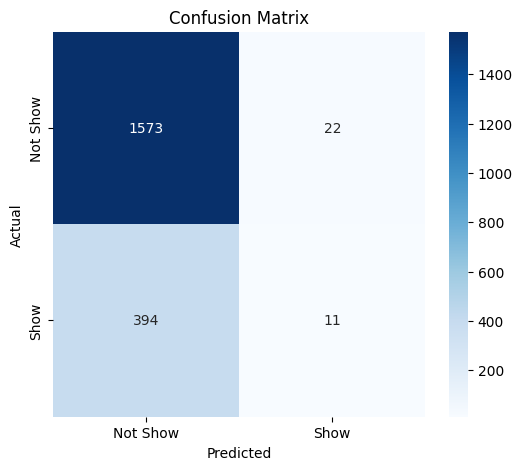

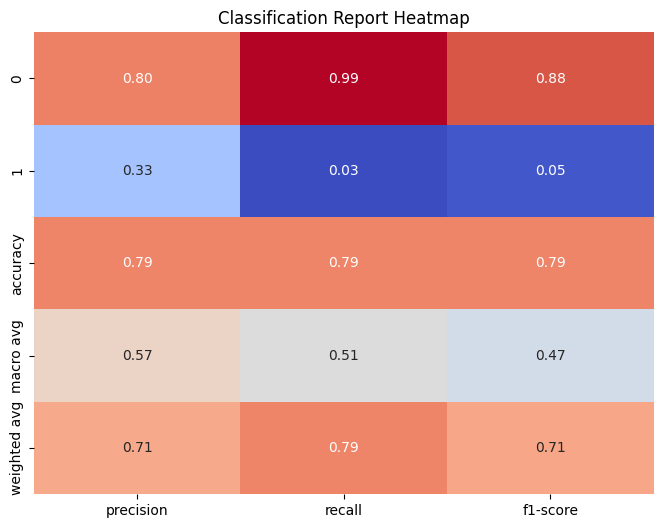

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("preprocessed_dataset.csv")
df = df.sample(n=10000, random_state=42)

target_column = 'No-show'
X = df.drop(columns=[target_column])
y = df[target_column]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

svm_clf = LinearSVC(
    C=1,
    loss='squared_hinge',
    penalty='l2',
    max_iter=10000,
    class_weight=None,
    dual=True,
    random_state=42
)
svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

cv_scores = cross_val_score(svm_clf, X_scaled, y, cv=3)
print("Mean CV Accuracy:", cv_scores.mean())

conf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Show', 'Show'], yticklabels=['Not Show', 'Show'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report).iloc[:-1, :].T
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(class_report_df, annot=True, cmap='coolwarm', cbar=False, fmt='.2f')
plt.title('Classification Report Heatmap')
plt.show()


Test #20

C= 10 | loss= hinge | penalty=l2 | max_iter=20000 | lass_weight=balanced | dual=true


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Confusion Matrix:
 [[1036  559]
 [ 158  247]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.65      0.74      1595
           1       0.31      0.61      0.41       405

    accuracy                           0.64      2000
   macro avg       0.59      0.63      0.58      2000
weighted avg       0.75      0.64      0.68      2000

Accuracy: 0.6415


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Mean CV Accuracy: 0.6380007526847465


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


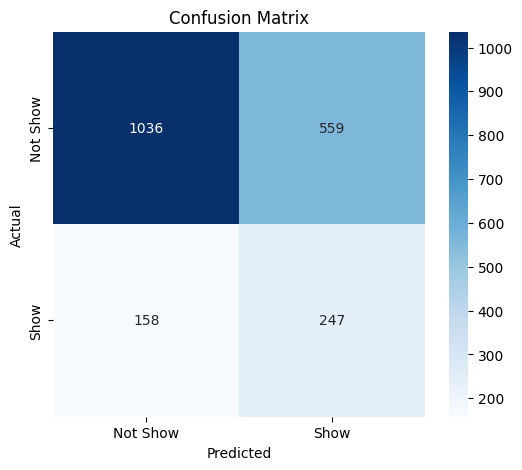

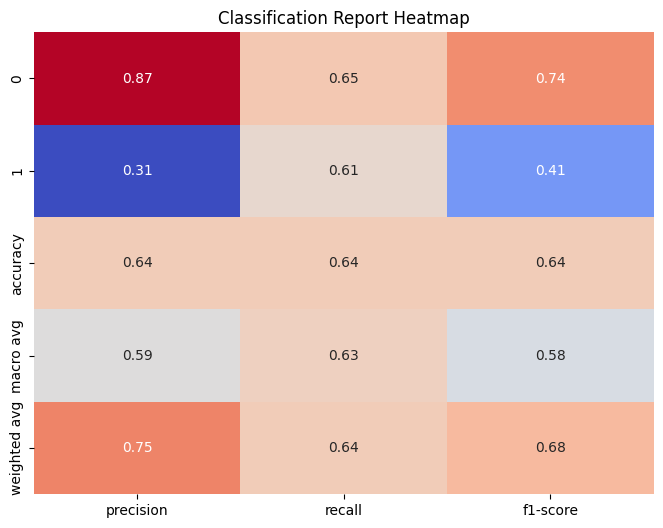

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("preprocessed_dataset.csv")
df = df.sample(n=10000, random_state=42)

target_column = 'No-show'
X = df.drop(columns=[target_column])
y = df[target_column]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

svm_clf = LinearSVC(
    C=10,
    loss='hinge',
    penalty='l2',
    max_iter=20000,
    class_weight='balanced',
    dual=True,
    random_state=42
)
svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

cv_scores = cross_val_score(svm_clf, X_scaled, y, cv=3)
print("Mean CV Accuracy:", cv_scores.mean())

conf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Show', 'Show'], yticklabels=['Not Show', 'Show'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report).iloc[:-1, :].T
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(class_report_df, annot=True, cmap='coolwarm', cbar=False, fmt='.2f')
plt.title('Classification Report Heatmap')
plt.show()


Test #21

 C= 100 | loss= squared_hinge | penalty=l2 | max_iter=15000 | lass_weight=blank | dual=true


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Confusion Matrix:
 [[1491  104]
 [ 354   51]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.93      0.87      1595
           1       0.33      0.13      0.18       405

    accuracy                           0.77      2000
   macro avg       0.57      0.53      0.52      2000
weighted avg       0.71      0.77      0.73      2000

Accuracy: 0.771


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Mean CV Accuracy: 0.7776000455474462


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


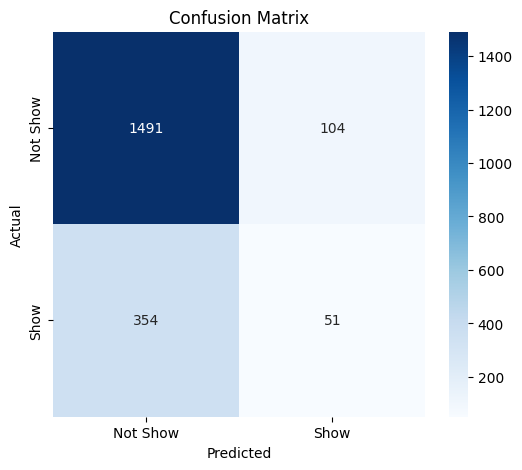

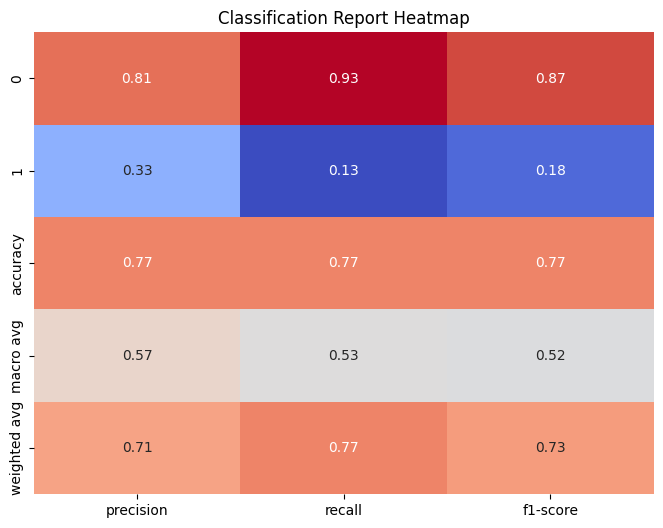

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("preprocessed_dataset.csv")
df = df.sample(n=10000, random_state=42)

target_column = 'No-show'
X = df.drop(columns=[target_column])
y = df[target_column]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

svm_clf = LinearSVC(
    C=100,
    loss='squared_hinge',
    penalty='l2',
    max_iter=15000,
    class_weight=None,
    dual=True,
    random_state=42
)
svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

cv_scores = cross_val_score(svm_clf, X_scaled, y, cv=3)
print("Mean CV Accuracy:", cv_scores.mean())

conf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Show', 'Show'], yticklabels=['Not Show', 'Show'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report).iloc[:-1, :].T
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(class_report_df, annot=True, cmap='coolwarm', cbar=False, fmt='.2f')
plt.title('Classification Report Heatmap')
plt.show()
